In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # To display all columns in the DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy.io.arff import loadarff as load_arff
from pprint import pprint
import statistics
from statistics import mode
import collections
from collections import Counter

import sklearn
import random
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
## xgboost packages
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

random.seed(0)
np.random.seed(0)

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/IT_for_healthcare/')


In [ ]:
!pip install statistics
import inspect
my_packages_path = os.path.dirname(inspect.getfile(inspect))+"/site-packages"
!python -m pip install pycountry-convert -t my_packages_path

  Using cached pycountry_convert-0.7.2-py3-none-any.whl.metadata (7.2 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl.metadata (7.9 kB)
  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
  Using cached pytest-8.3.4-py3-none-any.whl.metadata (7.5 kB)
  Using cached pytest_mock-3.14.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytest_cov-6.0.0-py3-none-any.whl.metadata (27 kB)
  Using cached repoze.lru-0.7-py3-none-any.whl.metadata (1.1 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached exceptiongroup-1.2.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.1/343.1 kB 11.

In [ ]:
!pip install pycountry-convert

  Using cached pycountry_convert-0.7.2-py3-none-any.whl.metadata (7.2 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl.metadata (7.9 kB)
  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
  Using cached pytest_mock-3.14.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytest_cov-6.0.0-py3-none-any.whl.metadata (27 kB)
  Using cached repoze.lru-0.7-py3-none-any.whl.metadata (1.1 kB)
  Using cached coverage-7.6.8-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
Using cached pycountry_convert-0.7.2-py3-none-any.whl (13 kB)
Using cached pprintpp-0.4.0-py2.py3-none-any.whl (16 kB)
Using cached pycountry-24.6.1-py3-none-any.whl (6.3 MB)
Using cached pytest_cov-6.0.0-py3-none-any.whl (22 kB)
Using cached pytest_mock-3.14.0-py3-none-any.whl (9.9 kB)
Using cached repoze.lru-0.7-py3-none-any.whl (10 kB)
Using cached coverage-7.6.8-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.man

In [ ]:
from helper_functions import *
from model_pipelines_2 import *

magic_helper_func = magic_helper()

In [ ]:
raw_data = load_arff('/content/drive/MyDrive/IT_for_healthcare/Autism-Adult-Data.arff')
df_data = pd.DataFrame(raw_data[0])
df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [ ]:
df_meta = list(raw_data[1])
print("List of Variables:\n", df_meta);print()
print("Total No. of Columns:", len(df_meta))

List of Variables:
 ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']

Total No. of Columns: 21


In [ ]:
print(list(df_data['A1_Score'][:1])[0])
print(type(list(df_data['A1_Score'][:1])[0]))

b'1'
<class 'bytes'>


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
object_dtype_variables_df = df_data.select_dtypes([object])
object_dtype_variables = df_data.select_dtypes([object]).columns.to_list()
print("Object Datatype Features (Class Bytes):\n", object_dtype_variables);print()

# Display dataframe with only bytes string data
object_dtype_variables_df.head()

Object Datatype Features (Class Bytes):
 ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'f',b'White-European',b'no',b'no',b'United States',b'no',b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'f',b'White-European',b'no',b'yes',b'United States',b'no',b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'f',b'?',b'no',b'no',b'Egypt',b'no',b'18 and more',b'?',b'NO'


In [ ]:
df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [ ]:
df_data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# Decoding object dtype variables -> convert bytes strings to ordinary strings
for i in object_dtype_variables:
    df_data[i] = df_data[i].str.decode('utf-8')

# Rechecking the dataset
df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
df_data.rename(columns = {'contry_of_res':'Country_of_res'}, inplace = True)

df_data.rename(columns = {'age':'Age',
                         'gender':'Gender',
                         'ethnicity':'Ethnicity',
                         'jundice':'Jundice',
                         'austim':'Austim',
                         'used_app_before': 'Used_app_before',
                         'result':'Result',
                         'age_desc':'Age_desc',
                         'relation':'Relation'}, inplace=True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  Age              702 non-null    float64
 11  Gender           704 non-null    object 
 12  Ethnicity        704 non-null    object 
 13  Jundice          704 non-null    object 
 14  Austim           704 non-null    object 
 15  Country_of_res   704 non-null    object 
 16  Used_app_before  704 non-null    object 
 17  Result          

In [ ]:
# Checking dataset statistics (quantitative variables, so far)
df_data.describe()

,Age,Result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


In [ ]:
for i in df_data.columns:
    if i.startswith("A") and i.endswith("_Score"):
        df_data[i] = df_data[i].astype(int)        # Convert 'float' dtype to 'int' (integer values)

# Rechecking datatypes of the variables in the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  Age              702 non-null    float64
 11  Gender           704 non-null    object 
 12  Ethnicity        704 non-null    object 
 13  Jundice          704 non-null    object 
 14  Austim           704 non-null    object 
 15  Country_of_res   704 non-null    object 
 16  Used_app_before  704 non-null    object 
 17  Result          

In [ ]:
# Dataset shape
df_data.shape

(704, 21)

In [ ]:
df_data.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
df_data['Age'].describe()

,Age
count,702.000000
mean,29.698006
std,16.507465
min,17.000000
25%,21.000000
50%,27.000000
75%,35.000000
max,383.000000


In [ ]:
df_data = df_data.loc[~(df_data.Age.isnull()),:]

In [ ]:
count=0
for i in df_data.isnull().sum(axis=0):
    if i!=0:
        count+=1
if count==0:
    print('\033[1m'+"There are no null values present in the dataset.")
else:
    print('\033[1m'+"There are missing values present in the dataset.")

There are no null values present in the dataset.


In [ ]:
age_dict = dict(Counter(df_data["Age"]))
age_dict_sorted = {i: age_dict[i] for i in sorted(list(age_dict.keys()))}
print('\033[1m'+"Age data with sample count:\n"+'\033[0m', age_dict_sorted)

Age data with sample count:
 {17.0: 18, 18.0: 31, 19.0: 35, 20.0: 46, 21.0: 49, 22.0: 37, 23.0: 37, 24.0: 34, 25.0: 27, 26.0: 28, 27.0: 31, 28.0: 24, 29.0: 27, 30.0: 30, 31.0: 21, 32.0: 18, 33.0: 16, 34.0: 12, 35.0: 17, 36.0: 13, 37.0: 17, 38.0: 12, 39.0: 7, 40.0: 16, 41.0: 3, 42.0: 15, 43.0: 11, 44.0: 10, 45.0: 4, 46.0: 6, 47.0: 8, 48.0: 4, 49.0: 3, 50.0: 5, 51.0: 1, 52.0: 5, 53.0: 6, 54.0: 2, 55.0: 6, 56.0: 2, 58.0: 2, 59.0: 1, 60.0: 1, 61.0: 2, 64.0: 1, 383.0: 1}


In [ ]:
# Also, '383.0' is an invalid value of 'Age' number. Dropping all the values above 120 (assumed maximum human age)
df_data = df_data.loc[~(df_data.Age>120), :]

# Changing 'Age' datatype from 'float' to 'integer'
df_data['Age'] = df_data.Age.astype(int)

age_dict_new = dict(Counter(df_data["Age"]))
age_dict_sorted_new = {i: age_dict[i] for i in sorted(list(age_dict_new.keys()))}
print('\033[1m'+"Age data (integer) with sample count:\n"+'\033[0m', age_dict_sorted_new)

Age data (integer) with sample count:
 {17: 18, 18: 31, 19: 35, 20: 46, 21: 49, 22: 37, 23: 37, 24: 34, 25: 27, 26: 28, 27: 31, 28: 24, 29: 27, 30: 30, 31: 21, 32: 18, 33: 16, 34: 12, 35: 17, 36: 13, 37: 17, 38: 12, 39: 7, 40: 16, 41: 3, 42: 15, 43: 11, 44: 10, 45: 4, 46: 6, 47: 8, 48: 4, 49: 3, 50: 5, 51: 1, 52: 5, 53: 6, 54: 2, 55: 6, 56: 2, 58: 2, 59: 1, 60: 1, 61: 2, 64: 1}


In [ ]:
df_data['Result'] = df_data.Result.astype(int)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         701 non-null    int64 
 1   A2_Score         701 non-null    int64 
 2   A3_Score         701 non-null    int64 
 3   A4_Score         701 non-null    int64 
 4   A5_Score         701 non-null    int64 
 5   A6_Score         701 non-null    int64 
 6   A7_Score         701 non-null    int64 
 7   A8_Score         701 non-null    int64 
 8   A9_Score         701 non-null    int64 
 9   A10_Score        701 non-null    int64 
 10  Age              701 non-null    int64 
 11  Gender           701 non-null    object
 12  Ethnicity        701 non-null    object
 13  Jundice          701 non-null    object
 14  Austim           701 non-null    object
 15  Country_of_res   701 non-null    object
 16  Used_app_before  701 non-null    object
 17  Result           701 non-null    int64 


In [ ]:
object_dtype_variables = df_data.select_dtypes([object]).columns.to_list()

magic_helper_func.unique_vals(df=df_data,
            column_list=object_dtype_variables)

Unique values of 'Gender' variable:' {'m', 'f'}
Number of unique items in 'Gender':'2

Unique values of 'Ethnicity' variable:' {'White-European', 'Middle Eastern ', 'Turkish', 'South Asian', '?', 'Latino', 'Pasifika', 'Hispanic', 'Black', 'Asian', 'others', 'Others'}
Number of unique items in 'Ethnicity':'12

Unique values of 'Jundice' variable:' {'yes', 'no'}
Number of unique items in 'Jundice':'2

Unique values of 'Austim' variable:' {'yes', 'no'}
Number of unique items in 'Austim':'2

Unique values of 'Country_of_res' variable:' {'Bahamas', 'Finland', 'Sweden', 'AmericanSamoa', 'Argentina', 'Ethiopia', 'Belgium', 'Egypt', 'Oman', 'Ireland', 'Kazakhstan', 'United Kingdom', 'Japan', 'Mexico', 'Angola', 'Bangladesh', 'Saudi Arabia', 'Russia', 'Armenia', 'United States', 'Burundi', 'Austria', 'Afghanistan', 'Sri Lanka', 'Costa Rica', 'Uruguay', 'Brazil', 'Chile', 'Romania', 'Aruba', 'Azerbaijan', 'Iran', 'Germany', 'Iraq', 'France', 'Canada', 'South Africa', 'Jordan', 'Iceland', 'Tonga'

In [ ]:
# Adding an additional cateogrical value 'Less than 18' for 'Age' group less than 18 records in 'Age_desc' column
df_data['Age_desc'] = np.where(df_data['Age']<18, 'Less than 18', df_data['Age_desc'])

# Checking the number of new labels in the 'Age_desc' data column
df_data['Age_desc'].value_counts()

,count
Age_desc,
18 and more,683
Less than 18,18


In [ ]:
# Checking count of invalid character '?' in 'Relation' feature column
df_data['Relation'].value_counts()

,count
Relation,
Self,521
?,93
Parent,50
Relative,28
Others,5
Health care professional,4


In [ ]:
# Checking count of invalid character '?' in 'Ethnicity' feature column
df_data['Ethnicity'].value_counts()

,count
Ethnicity,
White-European,233
Asian,123
?,93
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13


In [ ]:
print(round(100*len(df_data.loc[((df_data.Relation=='?') & (df_data.Ethnicity=='?')), :])/len(df_data),3),"%")

13.267 %


In [ ]:
# Dropping these common records with invalid characters (as it would affect our analysis)
df = df_data.loc[((df_data.Relation!='?') & (df_data.Ethnicity!='?')),:]

# Also, 'Others' and 'others' categorical values in 'Ethnicity should be the same
df['Ethnicity'] = df['Ethnicity'].replace('others', 'Others')

In [ ]:
# Correcting country name representation of 'AmericanSamoa'
df["Country_of_res"] = df["Country_of_res"].replace('AmericanSamoa', 'American Samoa')

In [ ]:
# Retained slightly coarser data at Continent level
df['Continent'] = df['Country_of_res'].apply(lambda x: magic_helper_func.country_to_continent(x))

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Austim,Country_of_res,Used_app_before,Result,Age_desc,Relation,Class/ASD,Continent
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO,North America
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO,South America
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES,Europe
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO,North America
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,18 and more,Self,YES,North America


In [ ]:
print("Size of retained dataset       :", df.shape)
print(f"Percentage of dataset retained : {round(100*len(df)/len(df_data),3)}%")

Size of retained dataset       : (608, 22)
Percentage of dataset retained : 86.733%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         608 non-null    int64 
 1   A2_Score         608 non-null    int64 
 2   A3_Score         608 non-null    int64 
 3   A4_Score         608 non-null    int64 
 4   A5_Score         608 non-null    int64 
 5   A6_Score         608 non-null    int64 
 6   A7_Score         608 non-null    int64 
 7   A8_Score         608 non-null    int64 
 8   A9_Score         608 non-null    int64 
 9   A10_Score        608 non-null    int64 
 10  Age              608 non-null    int64 
 11  Gender           608 non-null    object
 12  Ethnicity        608 non-null    object
 13  Jundice          608 non-null    object
 14  Austim           608 non-null    object
 15  Country_of_res   608 non-null    object
 16  Used_app_before  608 non-null    object
 17  Result           608 non-null    int64 


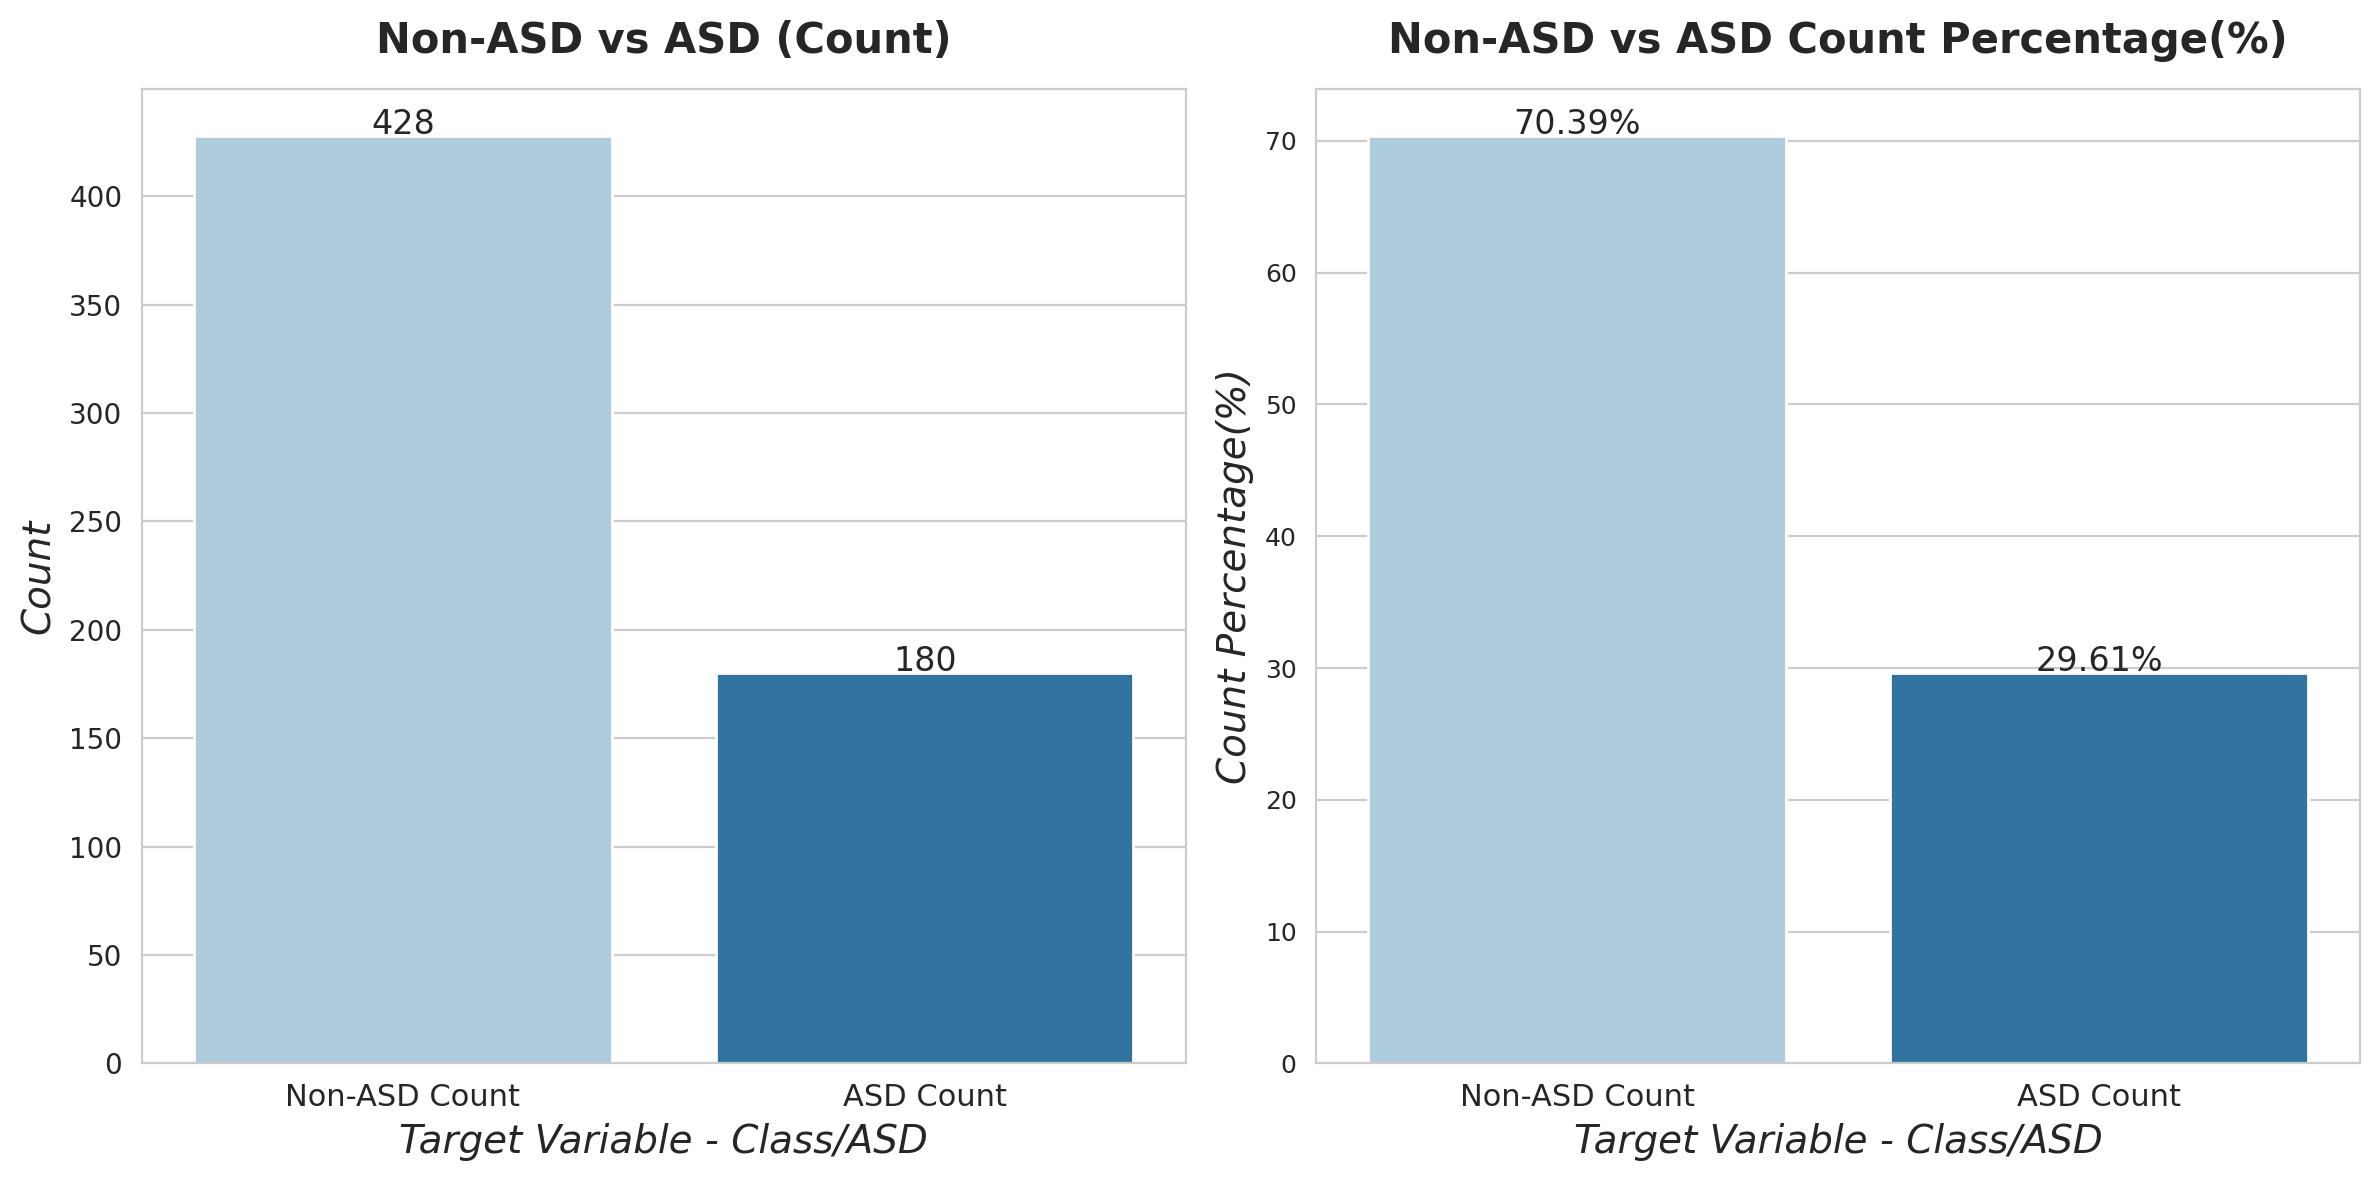

In [ ]:
magic_helper_func.create_bar_plot_target(df)

In [ ]:
new_object_dtype_variables = df.select_dtypes([object]).columns.to_list()
object_dtype_features = [i for i in new_object_dtype_variables if i!="Class/ASD"]
print("Object Data-Type Categorical Features:\n", object_dtype_features)

Object Data-Type Categorical Features:
 ['Gender', 'Ethnicity', 'Jundice', 'Austim', 'Country_of_res', 'Used_app_before', 'Age_desc', 'Relation', 'Continent']


In [ ]:
# Unique values belonging to object datatype features
magic_helper_func.unique_vals(df, object_dtype_features)

Unique values of 'Gender' variable:' {'m', 'f'}
Number of unique items in 'Gender':'2

Unique values of 'Ethnicity' variable:' {'White-European', 'Middle Eastern ', 'Turkish', 'South Asian', 'Latino', 'Pasifika', 'Hispanic', 'Asian', 'Black', 'Others'}
Number of unique items in 'Ethnicity':'10

Unique values of 'Jundice' variable:' {'yes', 'no'}
Number of unique items in 'Jundice':'2

Unique values of 'Austim' variable:' {'yes', 'no'}
Number of unique items in 'Austim':'2

Unique values of 'Country_of_res' variable:' {'Bahamas', 'Finland', 'Sweden', 'Belgium', 'Ethiopia', 'Egypt', 'Oman', 'Ireland', 'United Kingdom', 'Mexico', 'Angola', 'Bangladesh', 'Saudi Arabia', 'Armenia', 'Russia', 'United States', 'Burundi', 'Afghanistan', 'Costa Rica', 'Sri Lanka', 'Austria', 'Uruguay', 'Brazil', 'Chile', 'Romania', 'Aruba', 'Iran', 'Germany', 'France', 'Canada', 'South Africa', 'Jordan', 'Iceland', 'Tonga', 'Malaysia', 'Philippines', 'New Zealand', 'Sierra Leone', 'Nepal', 'India', 'Netherlands

In [ ]:
print(df.columns)
df = df.reset_index()

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jundice', 'Austim', 'Country_of_res', 'Used_app_before',
       'Result', 'Age_desc', 'Relation', 'Class/ASD', 'Continent'],
      dtype='object')


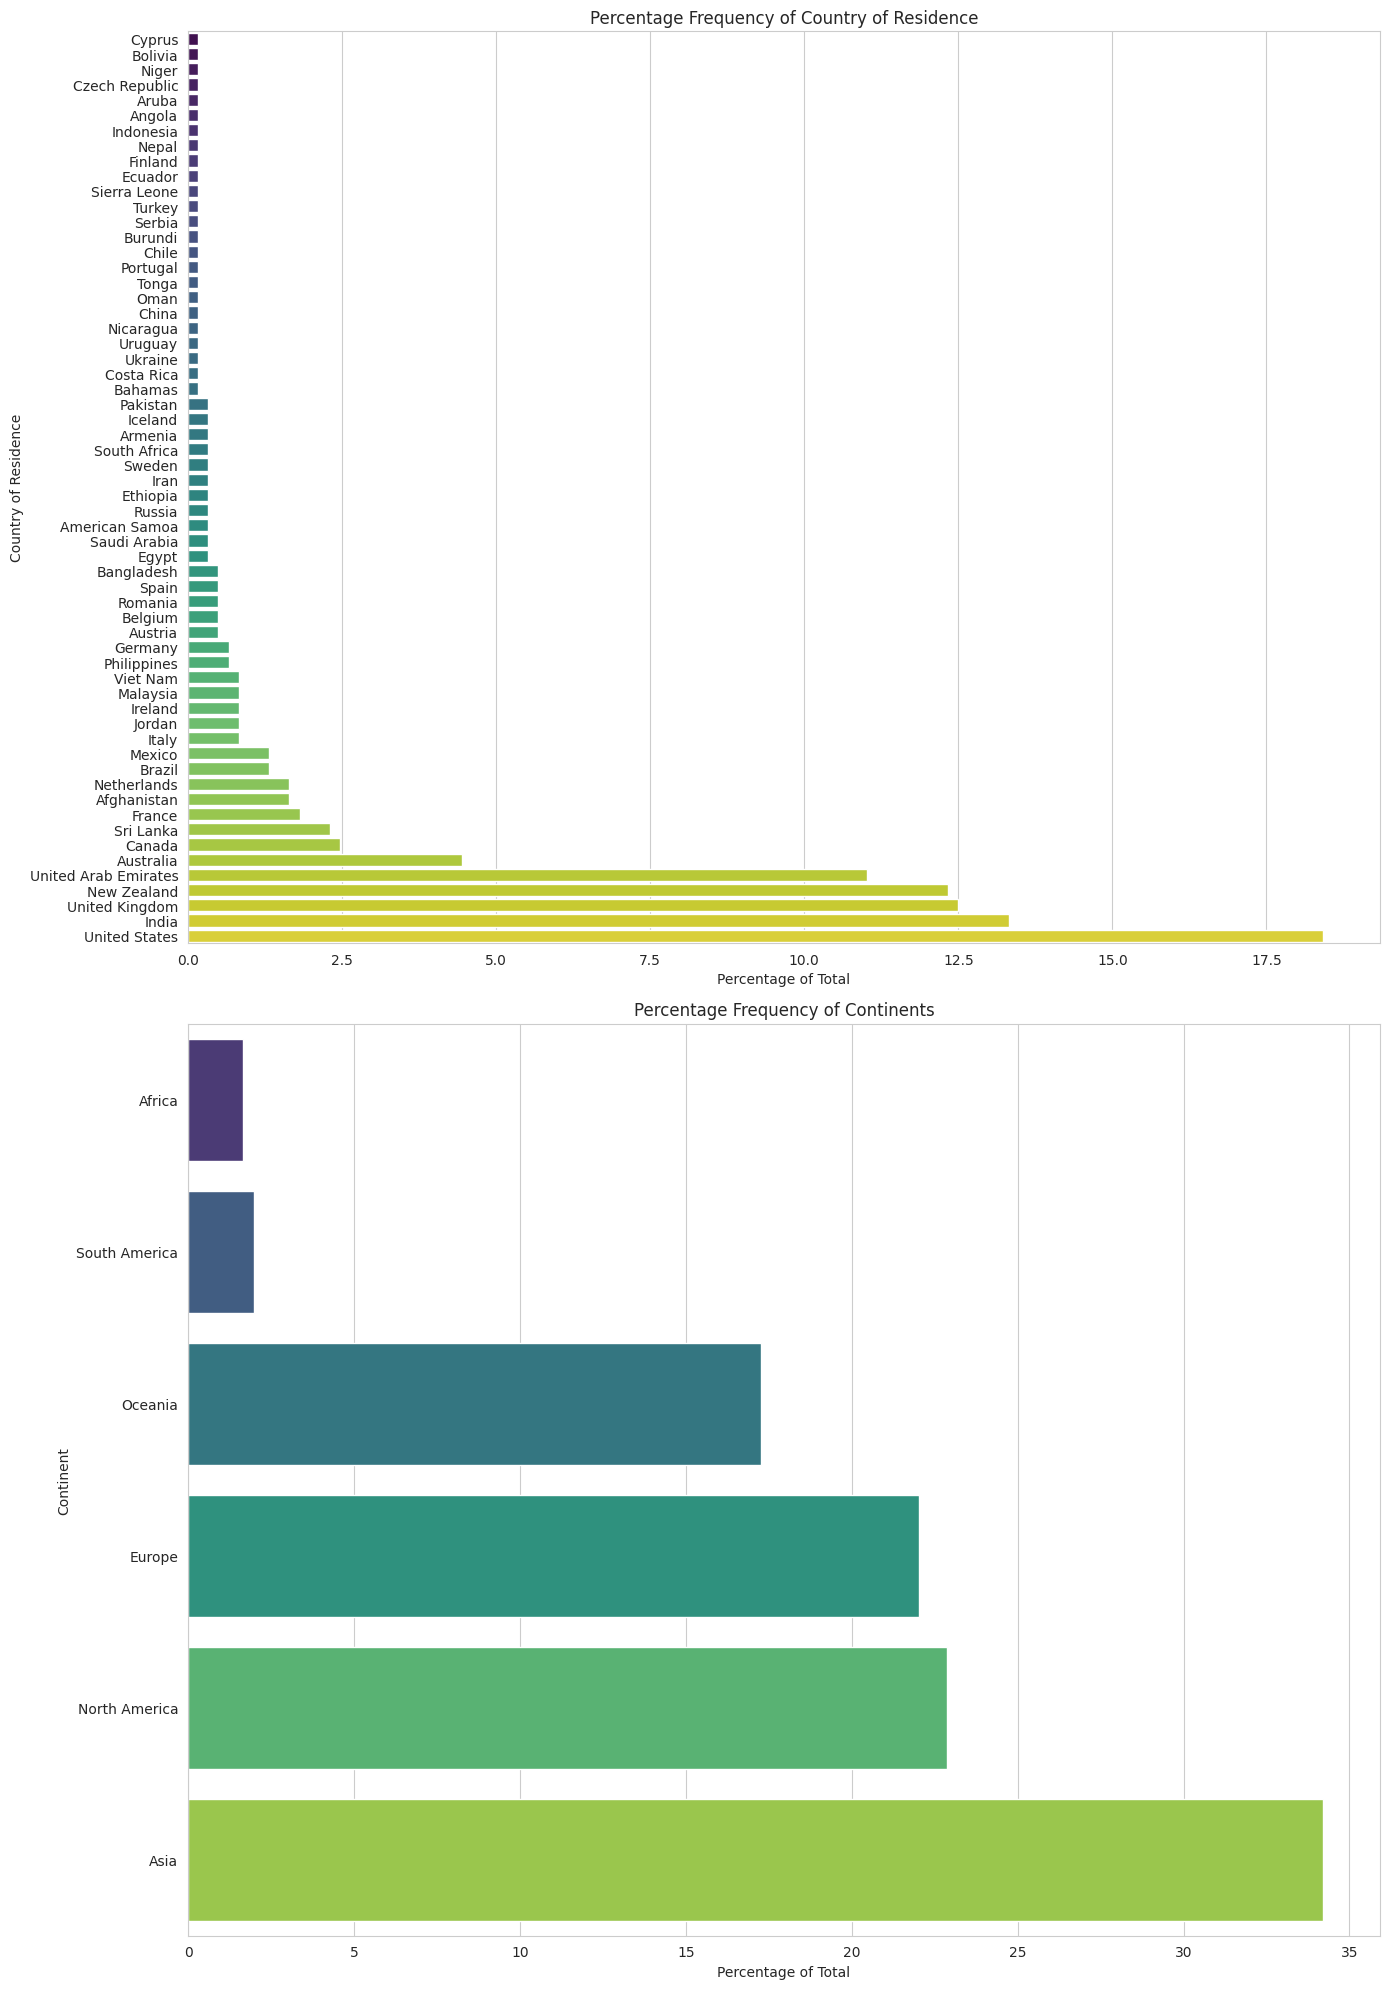

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate country frequency as a percentage
country_counts = df['Country_of_res'].value_counts(normalize=True).mul(100).sort_values()
continent_counts = df['Continent'].value_counts(normalize=True).mul(100).sort_values()

plt.figure(figsize=(14, 20))

# Plot for Country of Residence (as %)
plt.subplot(2, 1, 1)
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.xlabel('Percentage of Total')
plt.ylabel('Country of Residence')
plt.title('Percentage Frequency of Country of Residence')

# Plot for Continent (as %)
plt.subplot(2, 1, 2)
sns.barplot(x=continent_counts.values, y=continent_counts.index, palette="viridis")
plt.xlabel('Percentage of Total')
plt.ylabel('Continent')
plt.title('Percentage Frequency of Continents')

plt.tight_layout()
plt.show()


In [ ]:
# Dropping the 'Country_of_res' feature and retaining newly derived feature 'Continent'
df = df.drop(["Country_of_res"], axis=1)

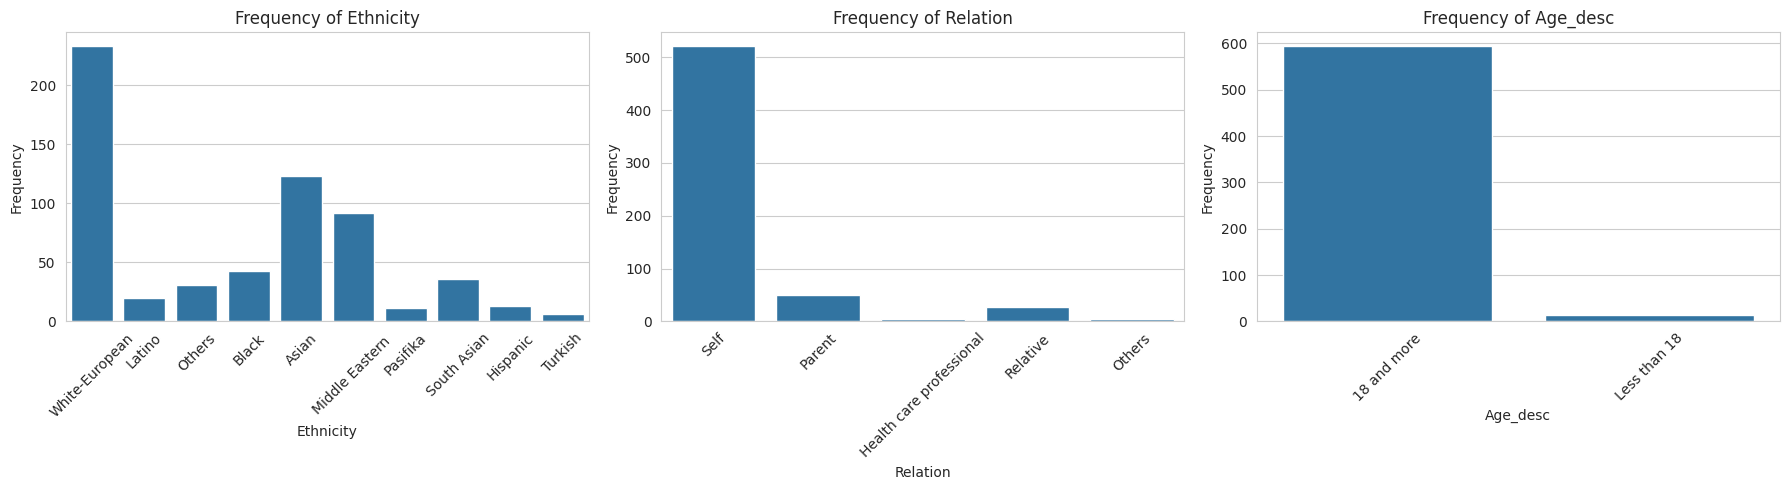

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Ethnicity', 'Relation', 'Age_desc']
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
df.dtypes

,0
index,int64
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64


In [ ]:
df = df.drop(["Result"], axis=1)

In [ ]:
df.drop("index", axis=1, inplace=True)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jundice', 'Austim', 'Used_app_before', 'Age_desc',
       'Relation', 'Class/ASD', 'Continent'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         608 non-null    int64 
 1   A2_Score         608 non-null    int64 
 2   A3_Score         608 non-null    int64 
 3   A4_Score         608 non-null    int64 
 4   A5_Score         608 non-null    int64 
 5   A6_Score         608 non-null    int64 
 6   A7_Score         608 non-null    int64 
 7   A8_Score         608 non-null    int64 
 8   A9_Score         608 non-null    int64 
 9   A10_Score        608 non-null    int64 
 10  Age              608 non-null    int64 
 11  Gender           608 non-null    object
 12  Ethnicity        608 non-null    object
 13  Jundice          608 non-null    object
 14  Austim           608 non-null    object
 15  Used_app_before  608 non-null    object
 16  Age_desc         608 non-null    object
 17  Relation         608 non-null    ob

In [ ]:

df['Gender'] = df['Gender'].map({'m': 1, 'f': 0})
df['Jundice'] = df['Jundice'].map({'yes': 1, 'no': 0})
df['Austim'] = df['Austim'].map({'yes': 1, 'no': 0})
df['Used_app_before'] = df['Used_app_before'].map({'yes': 1, 'no': 0})
df['Age_desc'] = df['Age_desc'].map({'18 and more': 1, 'Less than 18': 0})
df['Class/ASD'] = df['Class/ASD'].map({'YES': 1, 'NO': 0})

# Using 'get_dummies' for remaining object dtype variables
df = pd.get_dummies(df, drop_first=False)

# Check the final preprocessed dataset
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0,1,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,0,1,1,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
4,1,1,1,1,1,0,1,1,1,1,36,1,1,0,0,1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
df.shape

(608, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   A1_Score                           608 non-null    int64
 1   A2_Score                           608 non-null    int64
 2   A3_Score                           608 non-null    int64
 3   A4_Score                           608 non-null    int64
 4   A5_Score                           608 non-null    int64
 5   A6_Score                           608 non-null    int64
 6   A7_Score                           608 non-null    int64
 7   A8_Score                           608 non-null    int64
 8   A9_Score                           608 non-null    int64
 9   A10_Score                          608 non-null    int64
 10  Age                                608 non-null    int64
 11  Gender                             608 non-null    int64
 12  Jundice               

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=0)

In [ ]:
df_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
503,1,1,1,0,0,0,0,0,0,0,21,0,0,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
90,0,0,0,0,1,1,0,1,0,1,21,1,0,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
528,1,0,1,1,0,1,0,1,0,1,27,0,0,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
446,1,1,1,1,1,0,1,0,1,0,47,0,1,1,0,1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
200,1,1,1,1,0,0,0,0,0,1,42,1,0,0,0,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
scaler = MinMaxScaler()
num_variables = ["Age"]
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

df_test[num_variables] = scaler.transform(df_test[num_variables])

In [ ]:
df_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
503,1,1,1,0,0,0,0,0,0,0,0.090909,0,0,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
90,0,0,0,0,1,1,0,1,0,1,0.090909,1,0,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
528,1,0,1,1,0,1,0,1,0,1,0.227273,0,0,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
446,1,1,1,1,1,0,1,0,1,0,0.681818,0,1,1,0,1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
200,1,1,1,1,0,0,0,0,0,1,0.568182,1,0,0,0,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
# Train Data -  True Labels and Features
y_train = df_train.pop("Class/ASD")
X_train = df_train

# Validation Data - True Labels and Features
y_test = df_test.pop("Class/ASD")
X_test = df_test

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 37) (486,)
(122, 37) (122,)


In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy',\
                                   'ROC_AUC_Test', 'Threshold', 'Precision', 'Recall', 'F1 Score'])

## Model Selection

The following models have been chosen for this binary classification task:

   `1. Random Forest Classifier (KFold Cross-Validation) Model`<br>
   `2. XGBoost Classifier (KFold Cross-Validation) Model`<br>
   `3. KNeighborsClassifier (KFold Cross-Validation) Model`<br>
   `4. AdaBoostClassifier (KFold Cross-Validation) Model`<br>

In [ ]:
classifier_pipelines = classifier_pipelines()

****************************************************************************************************
Fitting 5 folds for each of 100 candidates, totalling 500 fits
****************************************************************************************************
Model Name: RandomForestClassifier_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=4,
                       min_samples_split=7, n_jobs=-1, random_state=0,
                       warm_start=True)
Best Cross-Validation Accuracy: 95.264%

Best (Optimal) Parameters:
 {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 7, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 9, 'randomfores

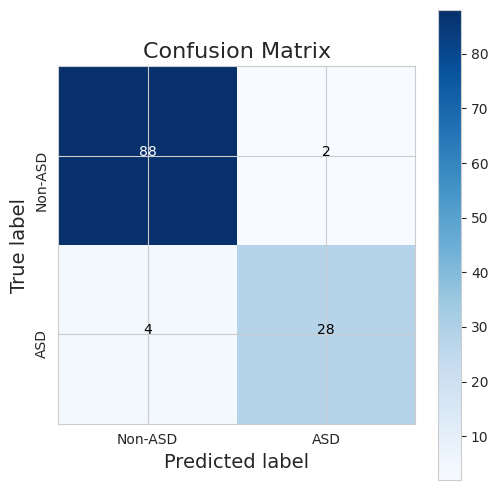

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.93      0.88      0.90        32

    accuracy                           0.95       122
   macro avg       0.94      0.93      0.94       122
weighted avg       0.95      0.95      0.95       122

Optimal Threshold: 0.4375

ROC for test dataset 98.889%


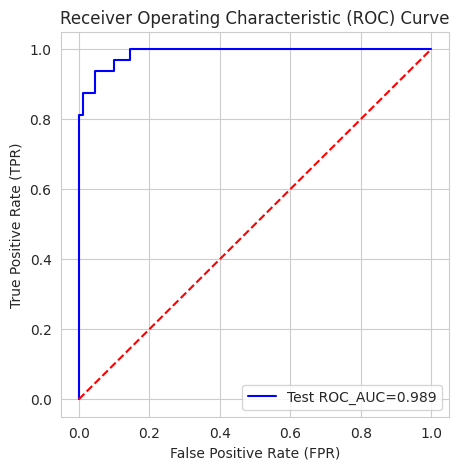


Time required to train the model: 8 minutes
****************************************************************************************************


In [ ]:
results_df1, clf_rfc = classifier_pipelines.RandomForestClassifier_KFoldCV_Model(X_train, y_train,
                                                           X_test, y_test,
                                                           "RandomForestClassifier_KFoldCV_Model",
                                                           results_df
                                                        )

****************************************************************************************************
Fitting 5 folds for each of 160 candidates, totalling 800 fits
****************************************************************************************************
Model Name: XGBoostClassifier_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_de

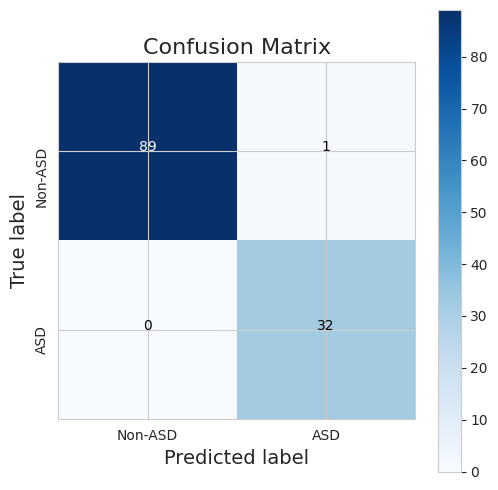

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.97      1.00      0.98        32

    accuracy                           0.99       122
   macro avg       0.98      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122

Optimal Threshold: 0.5200

ROC for test dataset 100.0%


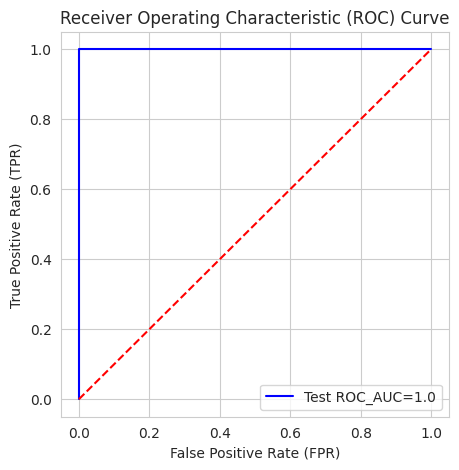


Time required to train the model: 2 minutes
****************************************************************************************************


In [ ]:
results_df1, clf_xgb = classifier_pipelines.XGBoostClassifier_KFoldCV_Model(X_train, y_train,
                                                      X_test, y_test,
                                                      "XGBoostClassifier_KFoldCV_Model",
                                                      results_df
                                                    )

****************************************************************************************************
Fitting 5 folds for each of 47 candidates, totalling 235 fits
****************************************************************************************************
Model Name: KNeighborsClassifier_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=49)
Best Cross-Validation Accuracy: 94.239%

Best (Optimal) Parameters:
 {'kneighborsclassifier__n_neighbors': 49}

Optimal hyperparameters:
Best n_neighbors (K): 49
****************************************************************************************************

Prediction and Evaluation results: On Actual TEST SET

Test ROC_AUC: 99.028%
Test Accuracy: 95.902%

Confusion Matrix
 Model Stats Scores Summary : 


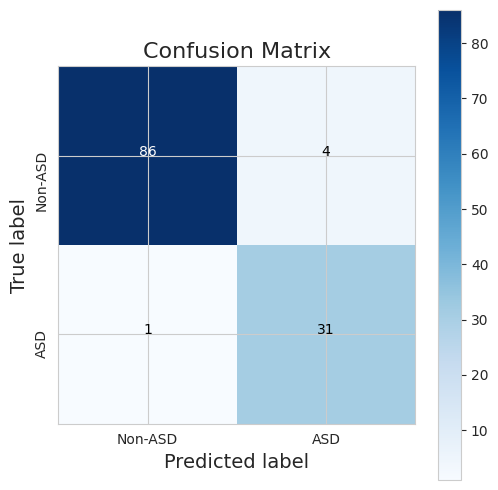

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.89      0.97      0.93        32

    accuracy                           0.96       122
   macro avg       0.94      0.96      0.95       122
weighted avg       0.96      0.96      0.96       122

Optimal Threshold: 0.6327

ROC for test dataset 99.028%


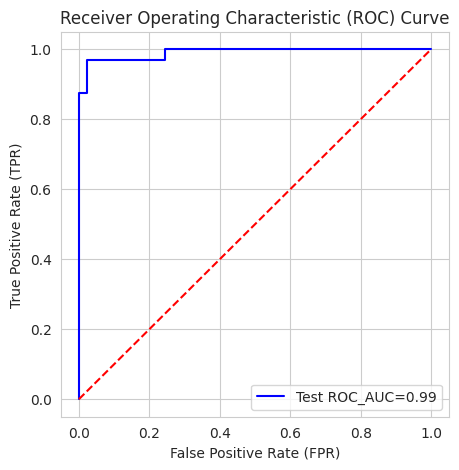


Time required to train the model: 13 seconds
****************************************************************************************************


In [ ]:
# Results dataframe and KNeighborsClassifier
results_df1, clf_knn = classifier_pipelines.KNeighborsClassifier_KFoldCV_Model(X_train, y_train,
                                                        X_test, y_test,
                                                        "KNeighborsClassifier_KFoldCV_Model",
                                                        results_df
                                                    )

****************************************************************************************************
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Optimal hyperparameters:
Best number of estimators: 500
Best learning rate: 0.5
****************************************************************************************************

Prediction and Evaluation results: On Actual TEST SET

Test ROC_AUC: 100.000%
Test Accuracy: 100.000%

Confusion Matrix
 Model Stats Scores Summary : 


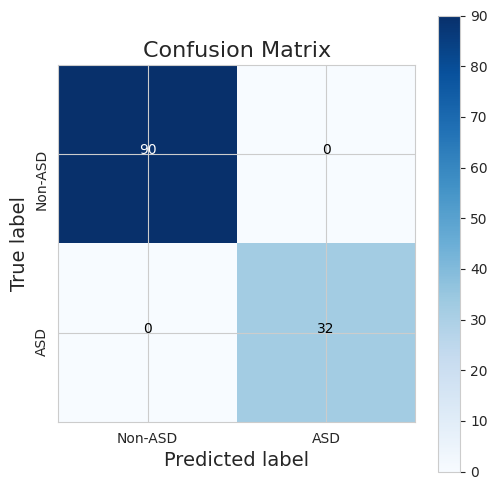

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        32

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Optimal Threshold: 0.5072

ROC for test dataset 100.0%


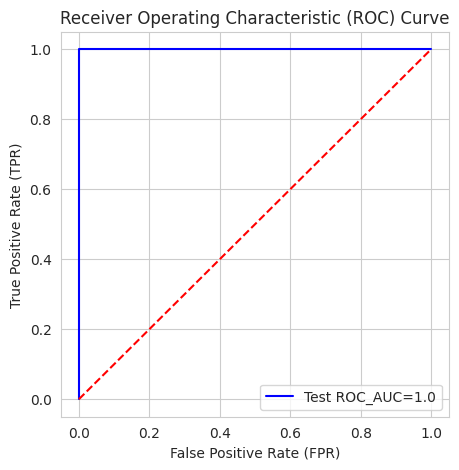

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
results_df1, clf_ada = classifier_pipelines.AdaBoostClassifier_KFoldCV_Model(X_train, y_train,
                                                           X_test, y_test,
                                                           "AdaBoostClassifier_KFoldCV_Model",
                                                           results_df
                                                        )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Final results dataframe
results_df1

In [ ]:
# Exporting the 'results' dataframe to a csv file
results_df.to_csv("/content/drive/MyDrive/IT_for_healthcare/results.csv", index=False)

## Saving all these models

In [ ]:
import joblib

In [ ]:
joblib.dump(clf_knn, '/content/drive/MyDrive/IT_for_healthcare/models/clf_knn.joblib')

In [ ]:
joblib.dump(clf_rfc, '/content/drive/MyDrive/IT_for_healthcare/models/clf_rfc.joblib')

In [ ]:
joblib.dump(clf_xgb, '/content/drive/MyDrive/IT_for_healthcare/models/clf_xgb.joblib')

In [ ]:
joblib.dump(clf_logreg, '/content/drive/MyDrive/IT_for_healthcare/models/clf_logreg.joblib')